In [1]:
import numpy as np
import pandas as pd

## STEPS:
    0. Get Data
    1. Data cleaning
    2. EDA
    3. Text processing
    4. Model Building
    5. Evaluation 
    6. Improvement
    7. Website
    8. Deployment

### 0. Get Data

In [2]:
df = pd.read_csv('data/spam.csv')


In [3]:
df.shape

(5572, 5)

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 1.Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 columns as they dont contain much data
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Rename the columns : v1-> target, v2 -> text
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#Lets apply encoder to target
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Check for missing values
df.isnull().sum()
#No missing values

target    0
text      0
dtype: int64

In [14]:
#Check for duplicate values
df.duplicated().sum()
#403 values are duplicated, have to remove those

403

In [15]:
df.drop_duplicates(keep = 'first', inplace= True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### 2.EDA

In [18]:
df['target'].value_counts()
#The dataset is imbalanced

0    4516
1     653
Name: target, dtype: int64

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sumanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#Create 3 more columns for no. of characters, words ,sentences in the text
nltk.word_tokenize(df['text'][0])
len(df['text'][0])

111

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [25]:
df.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [26]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,18.456375,1.962275
std,0.332253,58.174846,13.323322,1.433892
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
#Lets analyse Spam(1) & Ham(0) indiviually 
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#For Spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [31]:
#The number of words,character & senetences is usually more for a SPAM than HAM
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

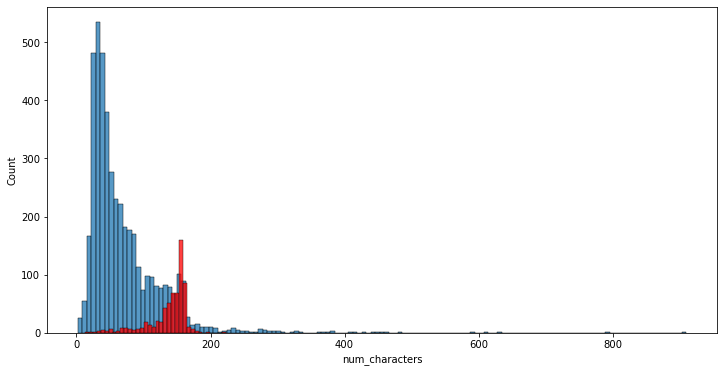

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:>

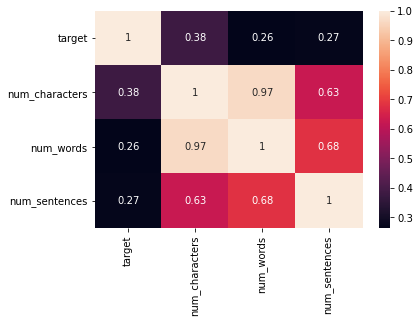

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
# 1. num_characters has more correlation with the target
# 2. num_characters and num_words are very closely correlated 

<Figure size 864x864 with 0 Axes>

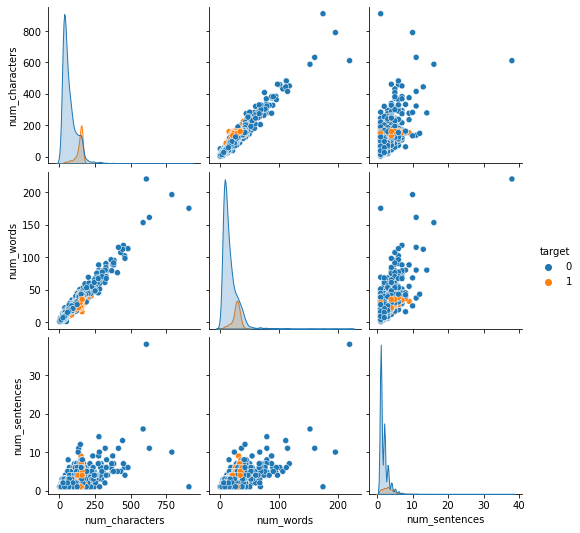

In [35]:
plt.figure(figsize=(12,12))
sns.pairplot(df,hue='target')

In [36]:
#There are few outliers in the data

### 3. Data Preprocessing
    1. Lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words & punctuation
    5. Stemming

In [37]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sumanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [c for c in text if c.isalnum()]
    inter = []
    
    for i in text:
        if i not in stopwords.words('english'):
            inter.append(i)
    text = inter[:]
    
    ps = PorterStemmer()
    inter.clear()
    
    for i in text:
        inter.append(ps.stem(i))
    
    text = inter[:]
    
    return " ".join(text)

In [39]:
transform_text(df['text'][10])
#transform_text("Congrats You got free iphone")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud

In [44]:
wc = WordCloud(width= 1750, height= 1750, min_font_size= 10 , background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

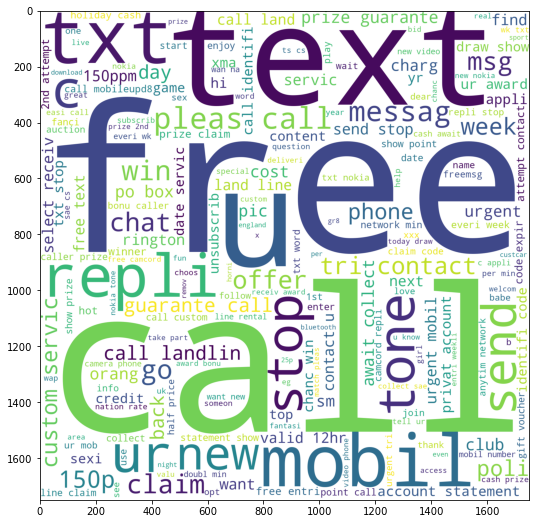

In [46]:
plt.figure(figsize=(12,9))
plt.imshow(spam_wc)

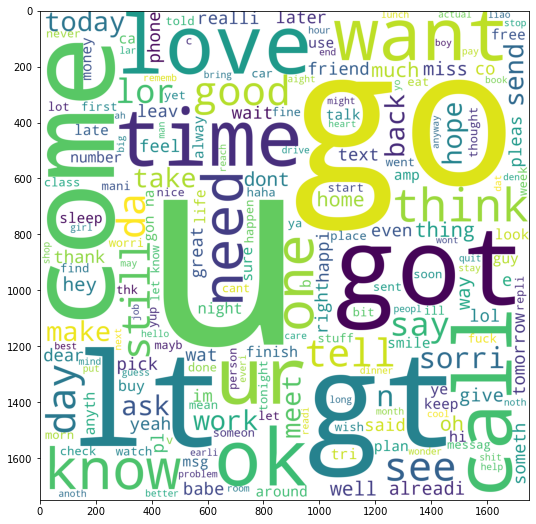

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,9))
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for i in df[df['target'] == 1]['transformed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9941

In [50]:
ham_corpus = []
for i in df[df['target'] == 0]['transformed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35303

C:\Users\Sumanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


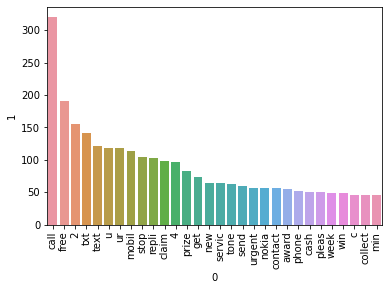

In [52]:
from collections import Counter
#pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Sumanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


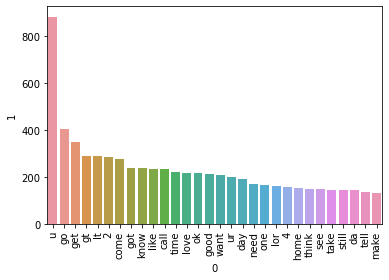

In [53]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
#cv = CountVectorizer()
#instead of Countvectrizer lets use tf-ids
tfidf = TfidfVectorizer()

In [55]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 6677)

In [58]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
y=df['target'].values

In [60]:
y.shape

(5169,)

In [61]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [62]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [63]:
def train(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
    

In [64]:
train(gnb, X_train, y_train, X_test, y_test)

Model: GaussianNB()
Accuracy : 0.8617021276595744
Precision: 0.5041666666666667
Confusion matrix: 
[[770 119]
 [ 24 121]]


In [65]:
train(bnb, X_train, y_train, X_test, y_test)

Model: BernoulliNB()
Accuracy : 0.9661508704061895
Precision: 0.9661016949152542
Confusion matrix: 
[[885   4]
 [ 31 114]]


In [64]:
train(mnb, X_train, y_train, X_test, y_test)

Model: MultinomialNB()
Accuracy : 0.9613152804642167
Precision: 0.9906542056074766
Confusion matrix: 
[[888   1]
 [ 39 106]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import tqdm.notebook as tq

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state =42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state= 42)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return {'accuracy': accuracy, 'precision':precision}
    

In [ ]:
out = train_classifier(svc, X_train, y_train, X_test, y_test)
out['accuracy']

In [ ]:
all_accuracy, all_precision = [], []
for clf_name,clf in tq.tqdm_notebook(clfs.items()):
    out = train_classifier(clf, X_train, y_train, X_test, y_test)
    all_accuracy.append(out['accuracy'])
    all_precision.append(out['precision'])

In [ ]:
performance_df = pd.DataFrame({'Model': clfs.keys(), 'accuracy': all_accuracy, 'precision': all_precision}).sort_values('precision', ascending=False)

In [ ]:
performance_df

### 5. Model Improvement

In [ ]:
#We can set tfidf max_features=3000, where it considers only top 3000 words -> TfidfVectorizer(max_features=3000)
#Lets append the dataframe with the outputs we got max_features=3000 
temp_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy_max_ft_3000':all_accuracy,'Precision_max_ft_3000':all_precision}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
performance_df_3000 = performance_df.merge(temp_df,on= 'Model')

In [ ]:
performance_df_3000

In [ ]:
#This is can be further improved by stacking or using voting ensembles etc.

In [69]:
import pickle

In [71]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('mnb_model.pkl','wb'))
#pickle.dump(mnb, open('mnb_model.pkl','wb'))

In [77]:
#1.Preprocess
transformed_text = transform_text("Congrats you have won the lottery")
print(transformed_text)
#2.Vectorize
vector_input = tfidf.transform([transformed_text])
print(vector_input)
mnb.predict(vector_input)

congrat lotteri
  (0, 1729)	1.0


array([0])

In [ ]:
Congrats you have got iphone for free

In [ ]:
mnb.classes_